
<h2>Impact of user ratings on video game sales ICE ONLINE STORE</h2>

You work for the Ice online store that sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation) and historical data on game sales are all available in open sources. You need to identify patterns that determine whether a game is successful or not. This will allow you to spot promising projects and plan advertising campaigns.

In front of you is data going back to 2016. Let's imagine it's December 2016 and you're planning a campaign for 2017.

The important thing is to gain experience working with data. It doesn't really matter if you're forecasting 2017 sales based on 2016 data or 2027 sales based on 2026 data.

The dataset contains a "rating" column that stores the ESRB rating for each game. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating of either Teen or Adult.

<h2>1 - IMPORTING LIBRARIES</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

<h2>2 - LOADING DATA</h2>

In [2]:
games = pd.read_csv("/datasets/games.csv")

<h2>3 - DATA EXPLORATION</h2>

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


There are `16,715` rows in the dataframe. It can be seen that columns `Name (16713)`, `Year_of_Release (16446)`, `Genre (16713)`, `Critic_Score (8137)`, `User_Score (10014)` and `Rating (9949)` contain missing NaN data (non-null data in parentheses)

The most missing data is in the `User_Score` and `Rating` columns. It will be determined later if this data can be replaced or deleted.

In [4]:
# We print a sample of the dataframe
games.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
6089,Hot Shots Golf: World Invitational,PS3,2012.0,Sports,0.00,0.00,0.28,0.00,NaN,7.9,E
15125,Escape the Emerald Star,PC,2011.0,Puzzle,0.02,0.00,0.00,0.00,NaN,tbd,E
7352,Tony Hawk's American Sk8land,DS,2005.0,Sports,0.19,0.00,0.00,0.02,84.0,8.7,E
10046,Pac 'n Roll,DS,2005.0,Platform,0.09,0.00,0.02,0.01,72.0,tbd,E
571,FIFA 17,XOne,2016.0,Sports,0.43,2.05,0.00,0.17,84.0,5.5,E
14295,PowerSlave,PS,1996.0,Shooter,0.02,0.01,0.00,0.00,NaN,NaN,NaN
5600,Pony Friends 2,DS,2009.0,Simulation,0.21,0.09,0.00,0.03,NaN,tbd,E
11497,NHL Breakaway 99,N64,1998.0,Sports,0.07,0.01,0.00,0.00,NaN,NaN,NaN
7476,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,0.15,0.05,0.00,0.00,NaN,NaN,NaN
8379,NickToons: Racing,PS,2001.0,Racing,0.09,0.06,0.00,0.01,NaN,NaN,NaN


Regarding the data type, the `Year_of_Release` column is of type float64 but must be modified to object type and the `User_Score` column is of type object but must be modified to type float64.

<h2>4 - DATA PREPROCESSING</h2>

### 4.1 Replace the column names (make them lowercase).

In [5]:
# We change all the column names to lowercase
games.columns = games.columns.str.lower()

# We show the names of the columns
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 4.2 Convert data to the required types.

As indicated above, the columns `Year_of_Release` and `User_Score` must be modified according to the observations in the data frame. Before proceeding to change the data type, it is necessary to identify the missing NaN values, since this data can cause errors in processing.

Column `year_of_release`

In [6]:
 # We mount the missing values
games[games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


There are 269 missing values ​​in the `year_of_release` column which represents 1.6% of the total data, which tells us that it is safe to remove the rows with missing data in the column.

In [7]:
games.dropna(subset=['year_of_release'], inplace=True)

In [8]:
# Changing the "year_of_release" column to integer-object
games['year_of_release'] = games['year_of_release'].astype('int')
games.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1449,Metroid: Other M,Wii,2010,Action,0.85,0.27,0.13,0.10,79.0,6.5,T
15053,Diabolik Lovers: Vandead Carnival,PSV,2014,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN
5107,Fushigi no Dungeon: Furai no Shiren 2 - Oni Sh...,N64,2000,Role-Playing,0.00,0.00,0.32,0.05,NaN,NaN,NaN
1668,Bayonetta,PS3,2009,Action,0.44,0.39,0.21,0.16,87.0,7.7,M
11746,Medal of Honor: Underground,GBA,2002,Shooter,0.05,0.02,0.00,0.00,46.0,1.7,T


`user_score` column

In [9]:
 # We show the missing values
games[games['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


There are 6607 missing values ​​in the `user_score` column which represents 39% of the total data, this is a very large portion of data so it is not possible to eliminate the missing data.
Additionally, this column presents `tbd` ("to be determined") data.

In [10]:
# We check the number of 'tbd' elements
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


There are 2376 `tbd` values ​​which represents 14% of the total data, this is a very large portion of data so it is not possible to remove the missing data, so we will replace it with `NaN` data and change the data to float64.

In [11]:
# We replace the 'tbd' values ​​to NaN
games['user_score'] = games['user_score'].replace('tbd', np.nan)

# change the user_score column to float
games['user_score'] = games['user_score'].astype('float')

games.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
11552,Superman: Shadow of Apokolips,GC,2003,Action,0.06,0.02,0.00,0.00,66.0,7.3,E
6195,Bass Strike,PS2,2001,Sports,0.14,0.11,0.00,0.04,57.0,5.8,E
15226,Shonen Jump's One Piece: Grand Adventure,PS2,2005,Fighting,0.01,0.01,0.00,0.00,NaN,NaN,NaN
14147,Super Battle For Money Sentouchuu: Kyuukyoku n...,3DS,2016,Action,0.00,0.00,0.03,0.00,NaN,NaN,NaN
7885,Shining Force II,GEN,1993,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN


`genre` column

In [12]:
# Review of missing values ​​in 'genre'
games[games['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


There are 2 missing values, which does not represent a problem for being eliminated.

In [13]:
# We eliminate the missing values ​​in the 'genre' column
games.dropna(subset=['genre'], inplace=True)

Column `name`

In [14]:
# Review of missing values ​​in 'genre'
games[games['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


No absent values ​​were found in column 'name'.

`critic_score` column

In [15]:
# Review of missing values ​​in 'genre'
games[games['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


There are 8461 missing values ​​in the `critic_score` column, which represents 50.6%

`rating` column

In [16]:
# Review of missing values ​​in rating
games[games['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


There are 6676 missing values ​​in the `rating` column, which represents 39%, so we cannot eliminate the rows as it is a very large portion of information.
Let's review the values ​​contained in the column.

In [17]:
games['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

We can see that categories like `EC`, `K-A`, `AO` and `RP` have few values ​​so we can join them to the higher ranking categories.

In [18]:
# Change of rating category
games['rating'] = games['rating'].replace('EC', 'E')
games['rating'] = games['rating'].replace('K-A', 'T')
games['rating'] = games['rating'].replace('AO', 'M')

games.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16509,Ride 2,PC,2016,Racing,0.00,0.01,0.00,0.00,78.0,7.9,E
15850,Battle Engine Aquila,XB,2003,Shooter,0.01,0.00,0.00,0.00,76.0,NaN,T
10083,Warhammer: Battle March,X360,2008,Strategy,0.09,0.02,0.00,0.01,55.0,6.7,M
10077,Naruto Ultimate Collection,PS2,2008,Misc,0.06,0.04,0.00,0.01,NaN,NaN,T
16637,Onigokko! Portable,PSP,2013,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN


`platform` column

In [19]:
# Review of missing values ​​in 'platform'
games[games['platform'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


There are no missing values ​​in the column `platform`

Column `na_sales`

In [20]:
# Checking for missing values ​​in 'na_sales'
games[games['na_sales'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Column `eu_sales`

In [21]:
# Review of missing values ​​in 'eu_sales'
games[games['eu_sales'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Column `jp_sales`

In [22]:
# Checking for missing values ​​in 'jp_sales'
games[games['jp_sales'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### 4.3. Calculate total sales (the sum of sales across all regions) for each game

Total sales of games from each region will be added together `na, eu and jp`

In [23]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] +games['other_sales'] 

games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
7028,Airblade,PS2,2001,Sports,0.11,0.09,0.00,0.03,70.0,5.8,T,0.23
2876,Yu-Gi-Oh! The Falsebound Kingdom,GC,2002,Strategy,0.49,0.13,0.07,0.02,NaN,NaN,NaN,0.71
9273,NCIS,X360,2011,Adventure,0.10,0.02,0.00,0.01,35.0,4.7,T,0.13
12249,Penguins of Madagascar,3DS,2014,Action,0.00,0.06,0.00,0.00,51.0,NaN,E,0.06
6599,Ice Age 2: The Meltdown,GBA,2006,Platform,0.18,0.07,0.00,0.00,NaN,NaN,E,0.25
11574,RoadKill,XB,2003,Action,0.06,0.02,0.00,0.00,68.0,7.4,M,0.08
14452,House M.D.,DS,2010,Adventure,0.02,0.00,0.00,0.00,NaN,NaN,T,0.02
15380,Casper: Spirit Dimensions,GC,2002,Platform,0.02,0.00,0.00,0.00,NaN,NaN,E,0.02
15609,Charlie's Angels,GC,2003,Action,0.01,0.00,0.00,0.00,23.0,3.3,T,0.01
7455,You Don't Know Jack,Wii,2011,Misc,0.19,0.00,0.00,0.01,81.0,7.7,T,0.20


### 4.4. Duplicate data review

In [24]:
# We check the duplicate rows of the DF
games[games.duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


There are no duplicate values

<h2>5 - DATA ANALYSIS</h2>

### 5.1 Games released in different years

In [25]:
games_year = games['year_of_release'].value_counts().sort_index(ascending=True).reset_index()
games_year.columns = ['year_of_release','count']
games_year

,year_of_release,count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


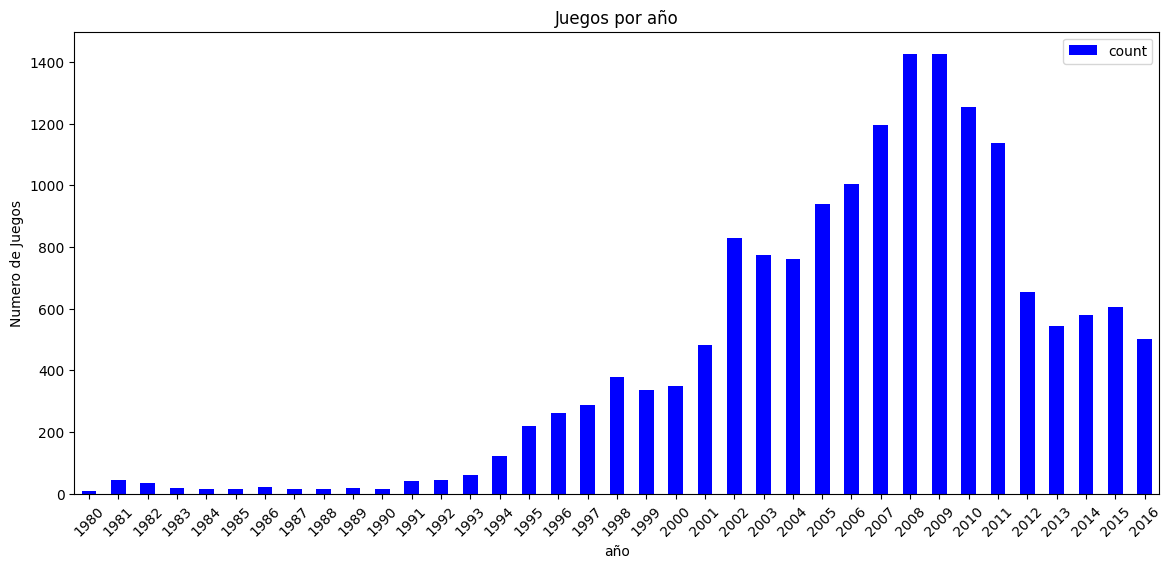

In [26]:
# Create the bar chart
games_year.plot(kind='bar', x='year_of_release', y='count', color='blue', figsize=(14,6))
plt.title('Juegos por año')
plt.xlabel('año')
plt.ylabel('Numero de Juegos')
plt.xticks(rotation= 45)  # Rotate x-axis labels
plt.show()

The release of older games has been on the rise since 1994, with the highest peak occurring between 2007 and 2010. There has also been a downward trend from 2011 to 2016.

### 5.2 Sales variation from one platform to another

Pick the platforms with the highest total sales and build a distribution based on each year's data. Look for platforms that used to be popular but now have no sales. How long does it usually take for new platforms to appear and old ones to disappear?

In [27]:
# We created a pivot table to show the total sales for each platform.

games_platform_sales = games.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
    .sort_values(by='total_sales', ascending=False)
games_platform_sales

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


The best-selling platforms are `PS2`, `X360`, `PS3`, `Wii`, `DS` and `PS`

Now we will review the sales distribution of the platforms with the highest sales.

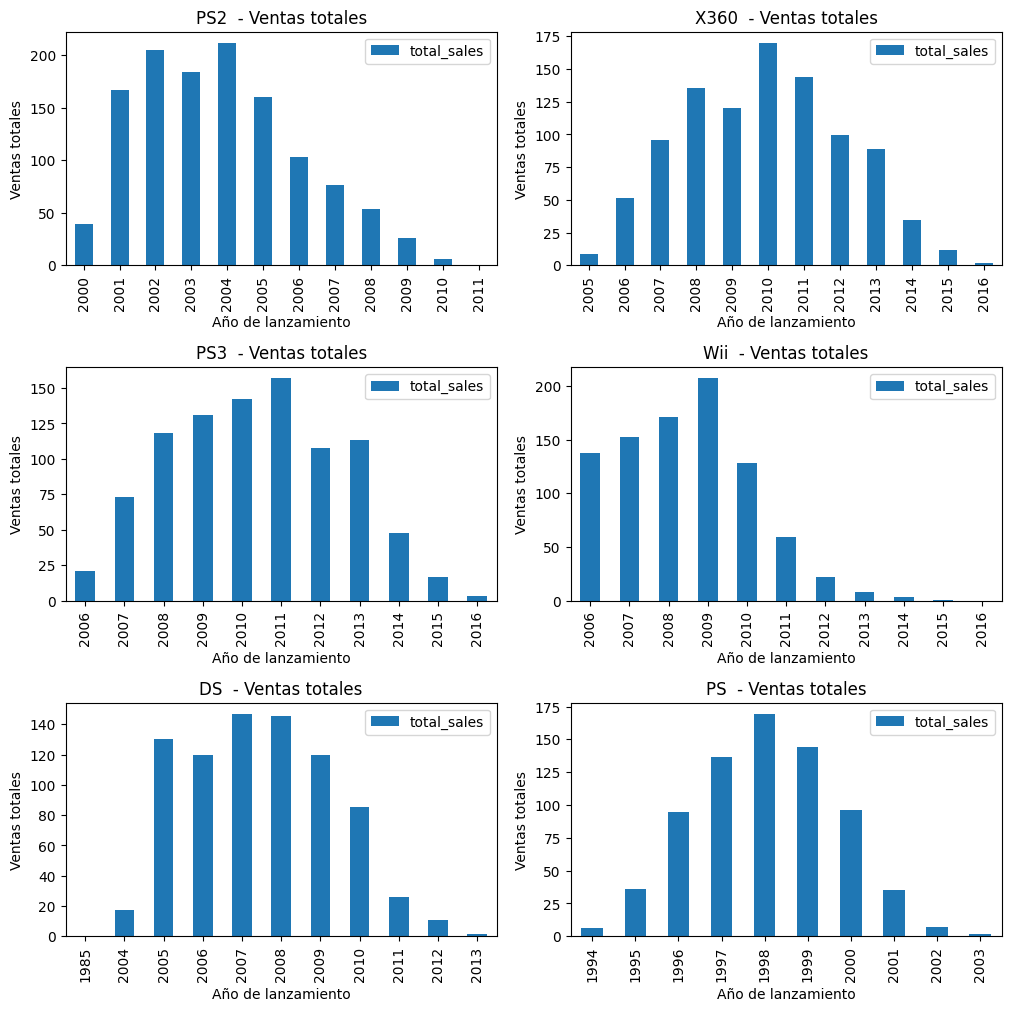

In [28]:
# We store the gaming platforms in a list:
platformas = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

# We use the plt.subplots function to join the 6 graphs that will be generated in the following loop:
plt.rcParams['figure.constrained_layout.use'] = True
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

# We create a loop to go through the list of `platforms`, obtain the data from each one and graph it:

i = 0 # variable that defines the location within plt.subplot
for platform in platformas:
    ax = axes[i // 2, i % 2]
    games[games['platform'] == platform].pivot_table(index='year_of_release', 
                                                     values='total_sales', 
                                                     aggfunc='sum').plot(kind='bar', 
                                                                         ax = ax,   
                                                                        title=(platform + '  - Ventas totales'),
                                                                        xlabel='Año de lanzamiento',
                                                                        ylabel='Ventas totales') 
    i+=1  # Add 1 to move the plot to another box in the subplot
plt.show() 

`How long does it usually take for new platforms to appear and old ones to disappear?`

The graphs show that the most popular platforms in terms of sales do not reach their peak sales until after 3 or 4 years. Also, the average lifespan of the platforms is 10 years.

### 5.3 Data Segmentation for 2017 Forecast

We will use data from the last 4 years

In [29]:
# Data sample from 2013 to 2016:
muestra = games[(games['year_of_release'] >= 2013) & (games['year_of_release'] <= 2016)]

# We grouped the data sample and calculated the total sales by platform in the period
muestra_agrupada = muestra.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
muestra_agrupada

platform
PS4     314.14
PS3     181.43
XOne    159.32
3DS     143.25
X360    136.80
WiiU     64.63
PC       39.43
PSV      32.99
Wii      13.66
PSP       3.50
DS        1.54
Name: total_sales, dtype: float64

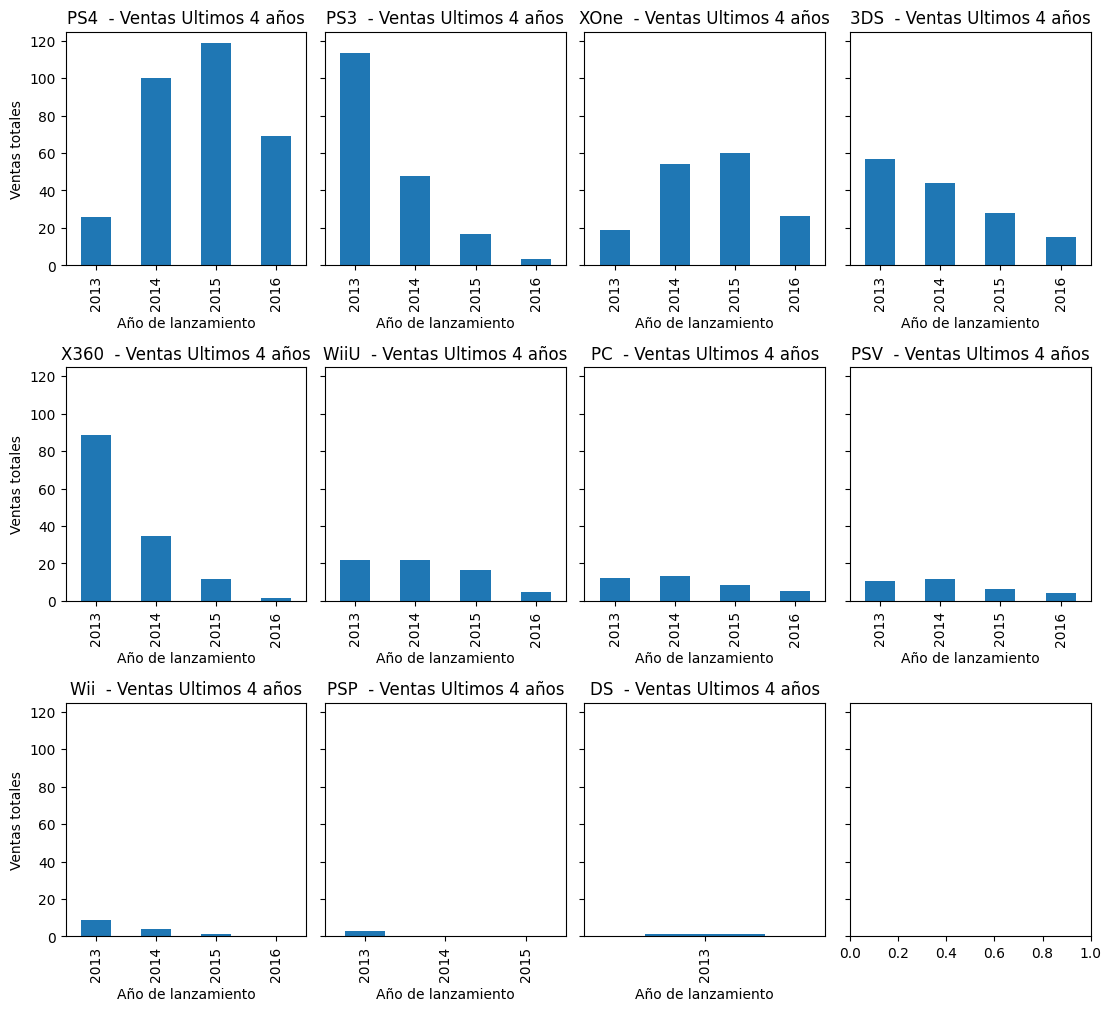

In [30]:
# We store the gaming platforms in a list:
platforms = muestra_agrupada.index

# We use the plt.subplots function to join the 6 graphs that will be generated in the following loop:
# We use the parameter sharey = True so that the graphs share the Y axis and we can compare them.
plt.rcParams['figure.constrained_layout.use'] = True
fig, axes = plt.subplots(3, 4, figsize=(11, 10),sharey=True)

# We create a loop to go through the list of `platforms`, obtain the data from each one and graph it:

i = 0 # variable that defines the location within plt.subplot
for platform in platforms:
    ax = axes[i // 4, i % 4]
    muestra[muestra['platform'] == platform].pivot_table(index='year_of_release', 
                                                     values='total_sales', 
                                                     aggfunc='sum').plot(kind='bar', 
                                                                         ax = ax,   
                                                                        title=(platform + '  - Ventas Ultimos 4 años'),
                                                                        xlabel='Año de lanzamiento',
                                                                        ylabel='Ventas totales',
                                                                        legend=False) 
    i+=1  # Add 1 to move the plot to another box in the subplot
plt.show() 

`Which platforms are leading in sales? Which ones are growing and which ones are declining?`

It is estimated that in 2017 the `PS4` and `XOne` platforms will lead the video game market. The `3DS`, `PC`, `WiiU` and `PSV` consoles are still within their video game period with a downward trend in sales. And finally, the `Wii`, `PSP`, `DS` and `X360` platforms will be discontinued by 2017.

### 5.4 Box plots for the last 4 years and average global sales by platform

`Box diagram of Platforms with HIGHEST sales projection (Data from the last 4 years)`

We will remove outliers for better visualization.

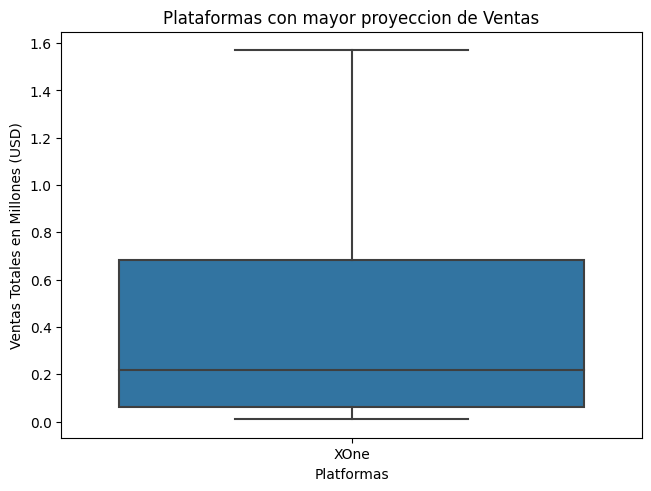

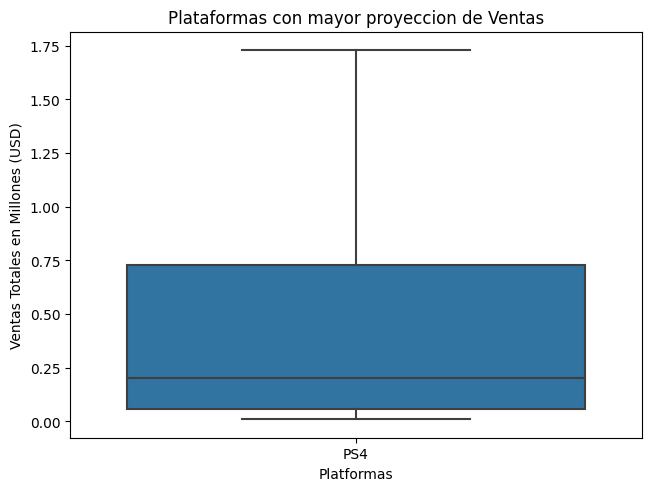

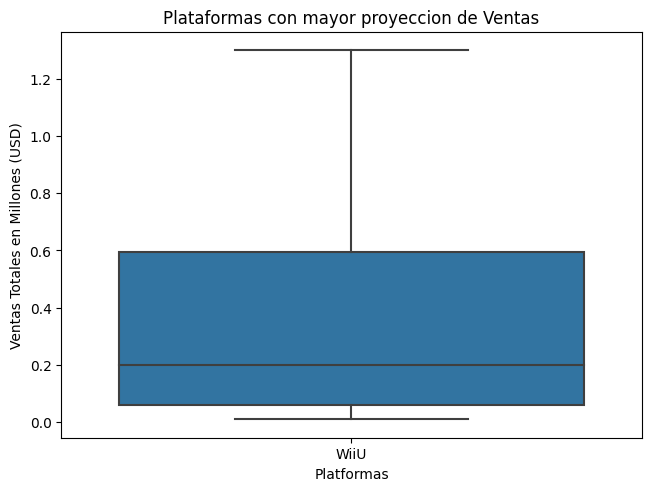

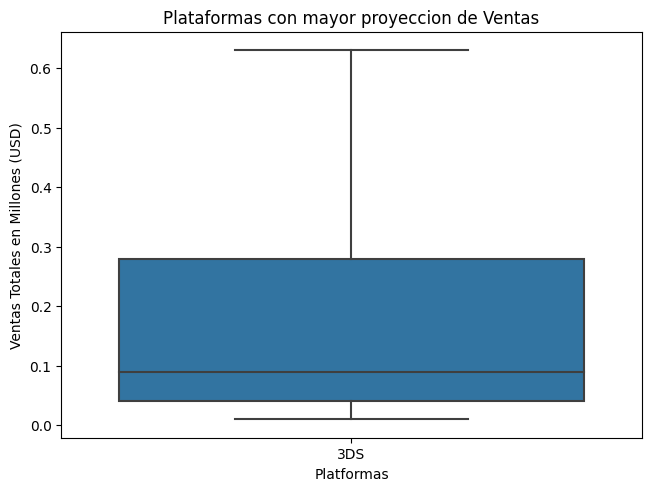

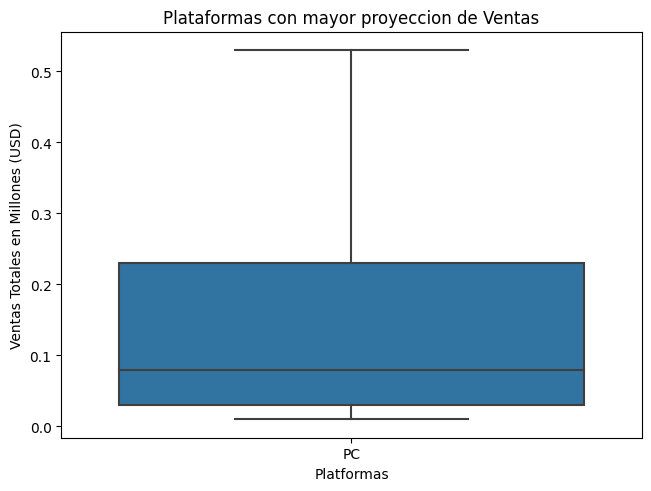

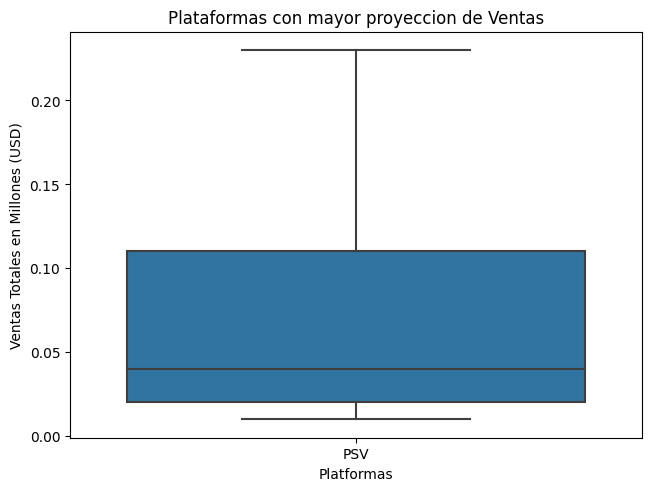

In [31]:
# We will graph the platforms with the highest sales projection for 2017 without outliers
platfors = ['XOne','PS4', 'WiiU', '3DS', 'PC', 'PSV']

for platfor in platfors:
    data = muestra[muestra['platform'] == platfor]
    
    sns.boxplot(data = data, y = 'total_sales', x='platform', showfliers=False).set(title = 'Plataformas con mayor proyeccion de Ventas',
                                                 xlabel = 'Platformas', 
                                                 ylabel = 'Ventas Totales en Millones (USD)')
    plt.show()

We insert the outliers into the box plots.

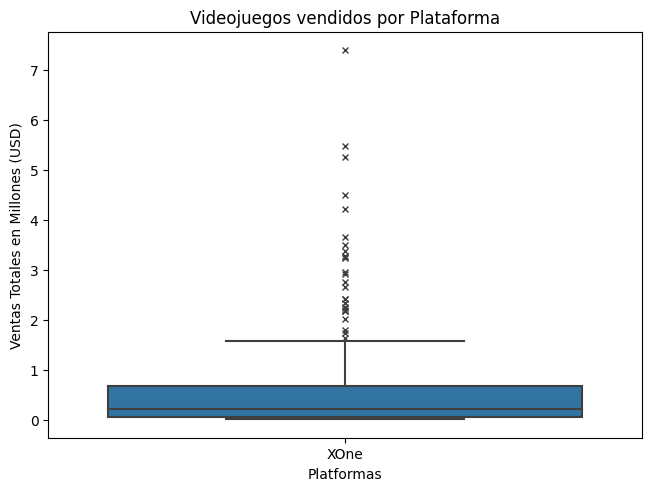

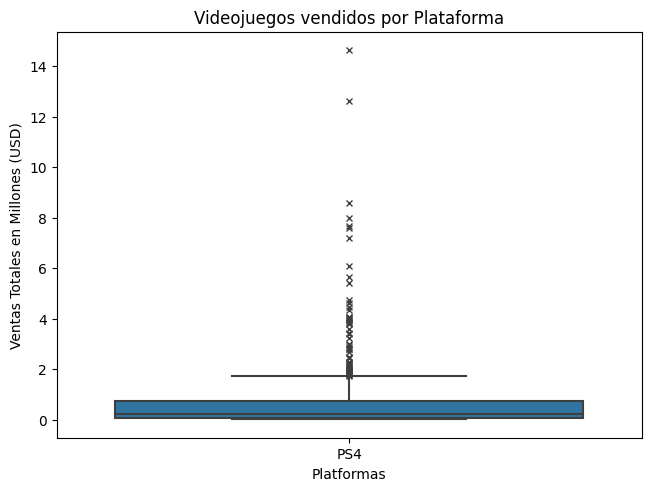

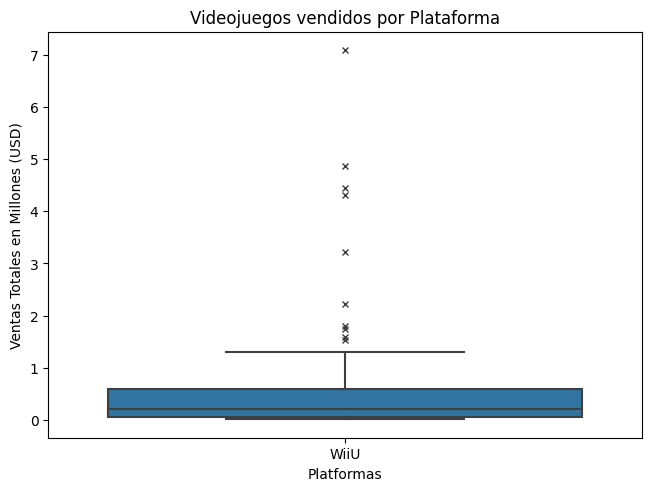

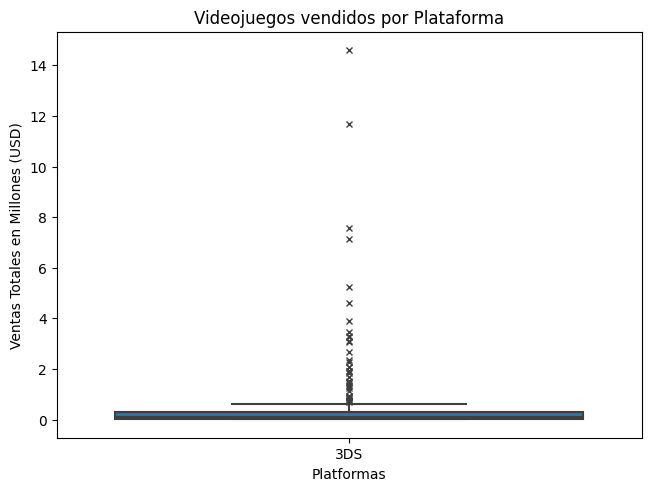

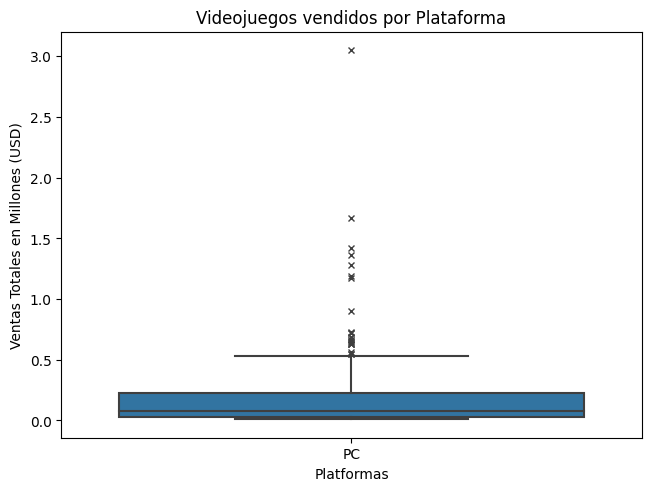

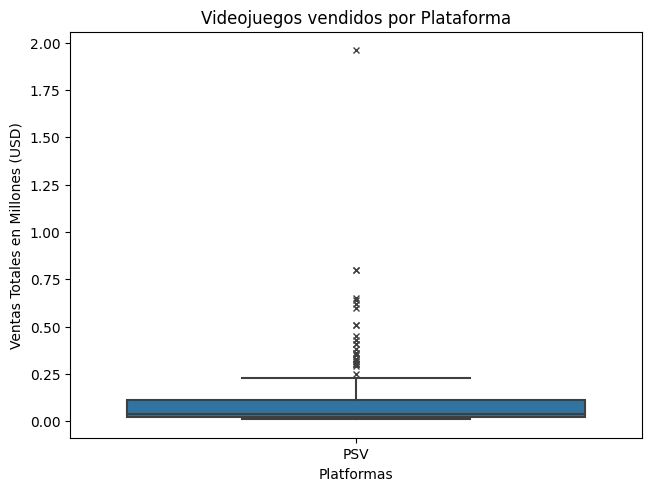

In [32]:
# We will graph the platforms with the highest sales projection for 2017 with atypical values
platfors = ['XOne','PS4', 'WiiU', '3DS', 'PC', 'PSV']

for platfor in platfors:
    data = muestra[muestra['platform']==platfor]
    sns.boxplot(data = data, y = 'total_sales', x='platform', 
                showfliers=True, 
                flierprops={"marker": "x"}).set(title = 'Videojuegos vendidos por Plataforma',
                                                 xlabel = 'Platformas', 
                                                 ylabel = 'Ventas Totales en Millones (USD)')
    plt.show()

`Average Platform Sales`

In [33]:
# List of platforms to review
platfors = ['XOne','PS4', 'WiiU', '3DS', 'PC', 'PSV']

# We calculate and print the average sales of the platforms
for platform in platfors:
    ventas_promedio = games.query('platform == @platform')['total_sales'].mean()
print(f"The total average sales for {platform} is {round(average_sales,3)}")

El promedio total de ventas para XOne es 0.645
El promedio total de ventas para PS4 es 0.801
El promedio total de ventas para WiiU es 0.559
El promedio total de ventas para 3DS es 0.504
El promedio total de ventas para PC es 0.267
El promedio total de ventas para PSV es 0.125


`Are the differences in sales significant? What about average sales across various platforms?`

The average sales for the XONE, PS4 and WiiU platforms are around $200,000 USD, with the higher end of the range being around $600,000 USD in annual sales. The 3DS, PC and PSV have the lowest average sales, with PSV being the best seller with an average of around $50,000 USD.

Global sales averages differ from the medians, for example the PS4 platform has an average sales of 678,000 USD while its median is 200,000 USD, the average is almost 3 times the average in sales. The same behavior is observed for the other platforms and everything points to the large presence of the upper extreme outliers. Platforms like the `PS4` or the `3DS` have outliers in the million range, much higher than their medians.

It is concluded that the platforms with the highest global sales are `PS4`, `XONE` and `WiiU`.

### 5.5 User and professional review

User reviews are in the `user_score` column and professional reviews are in the `critic_score` column. We will plot scatter plots of each review per platform and calculate the correlation between reviews and sales.

`PS4 Platform`

User Reviews vs Sales

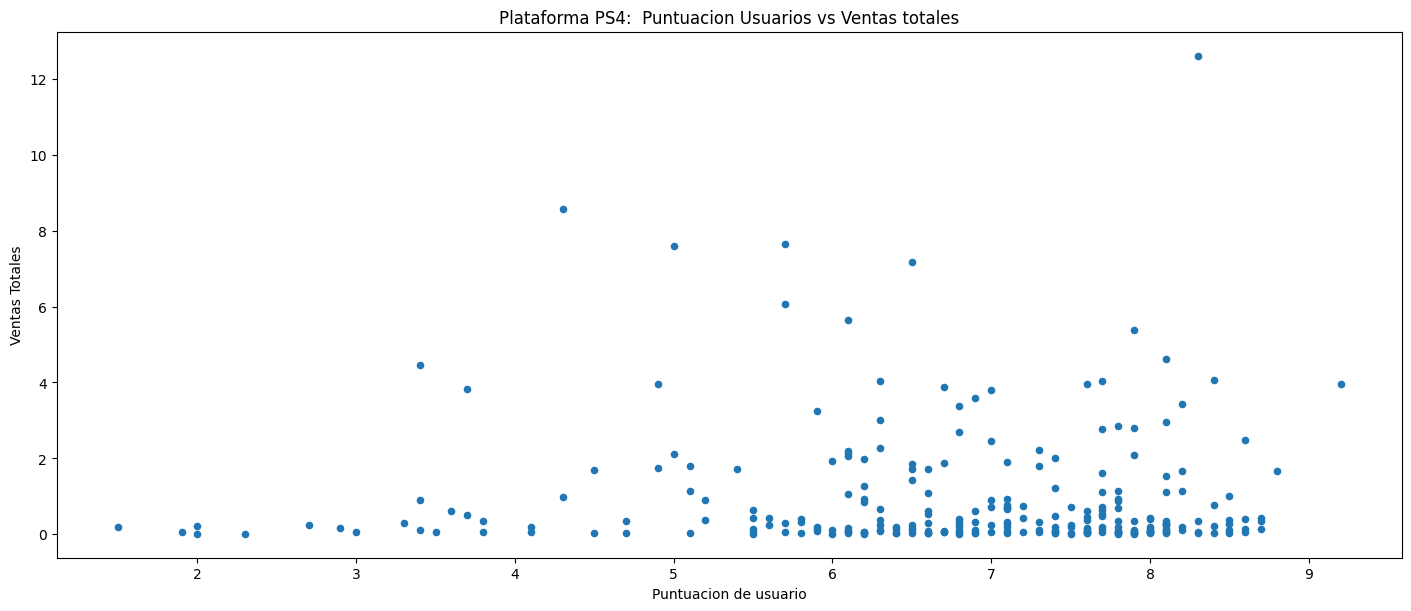

-0.031957110204556424

In [34]:
# xScatter diagram
games.query('platform == "PS4"').plot(x='user_score', y='total_sales', kind='scatter', figsize=(14,6))
plt.title('Plataforma PS4:  Puntuacion Usuarios vs Ventas totales')
plt.xlabel('Puntuacion de usuario')
plt.ylabel('Ventas Totales')
plt.show()

# We calculate the correlation between the review and sales
games.query('platform == "PS4"')['user_score'].corr(games.query('platform == "PS4"')['total_sales'])

With a correlation of `-0.0312` between video game sales and user reviews, it is concluded that there is no relationship between the variables.


Professional vs Sales Review

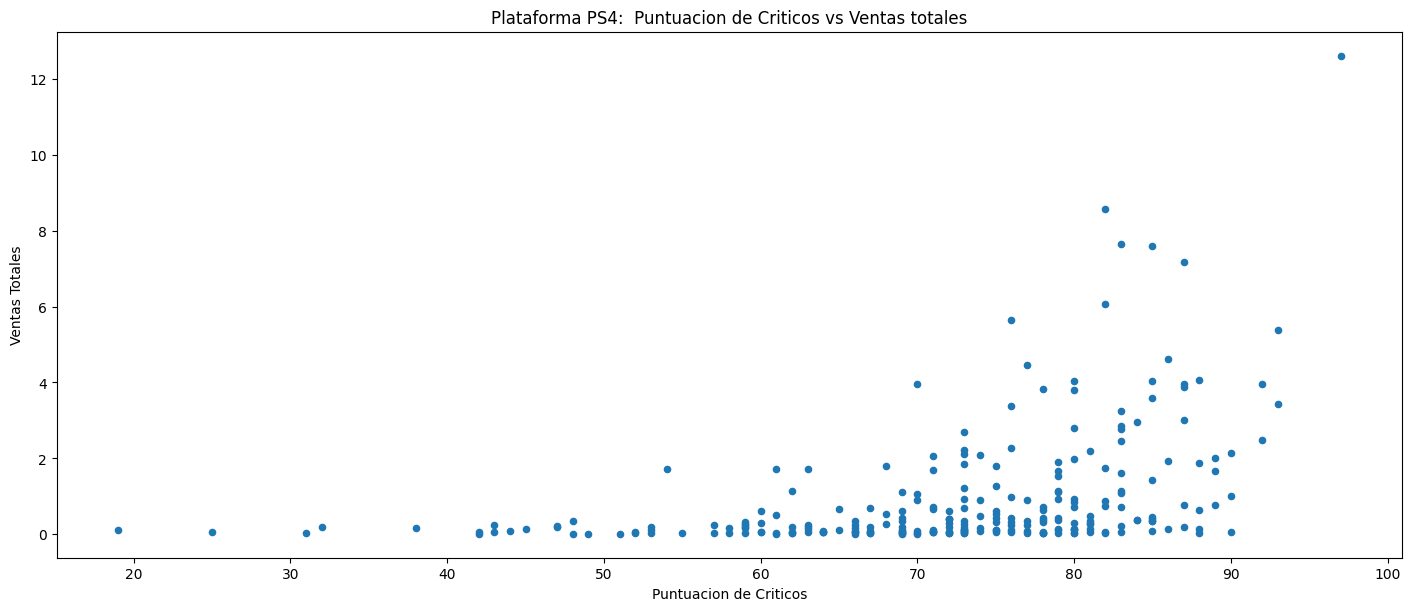

0.40656790206178095

In [35]:
# xScatter diagram
games.query('platform == "PS4"').plot(x='critic_score', y='total_sales', kind='scatter', figsize=(14,6))
plt.title('Plataforma PS4:  Puntuacion de Criticos vs Ventas totales')
plt.xlabel('Puntuacion de Criticos')
plt.ylabel('Ventas Totales')
plt.show()

# We calculate the correlation between the review and sales
games.query('platform == "PS4"')['critic_score'].corr(games.query('platform == "PS4"')['total_sales'])

With a correlation of `0.405` between critics' reviews and total sales, it is concluded that there is not a very strong relationship between the variables, some video games have few sales while the reviews of these have a high score.

`XOne Platform`

User Reviews vs Sales

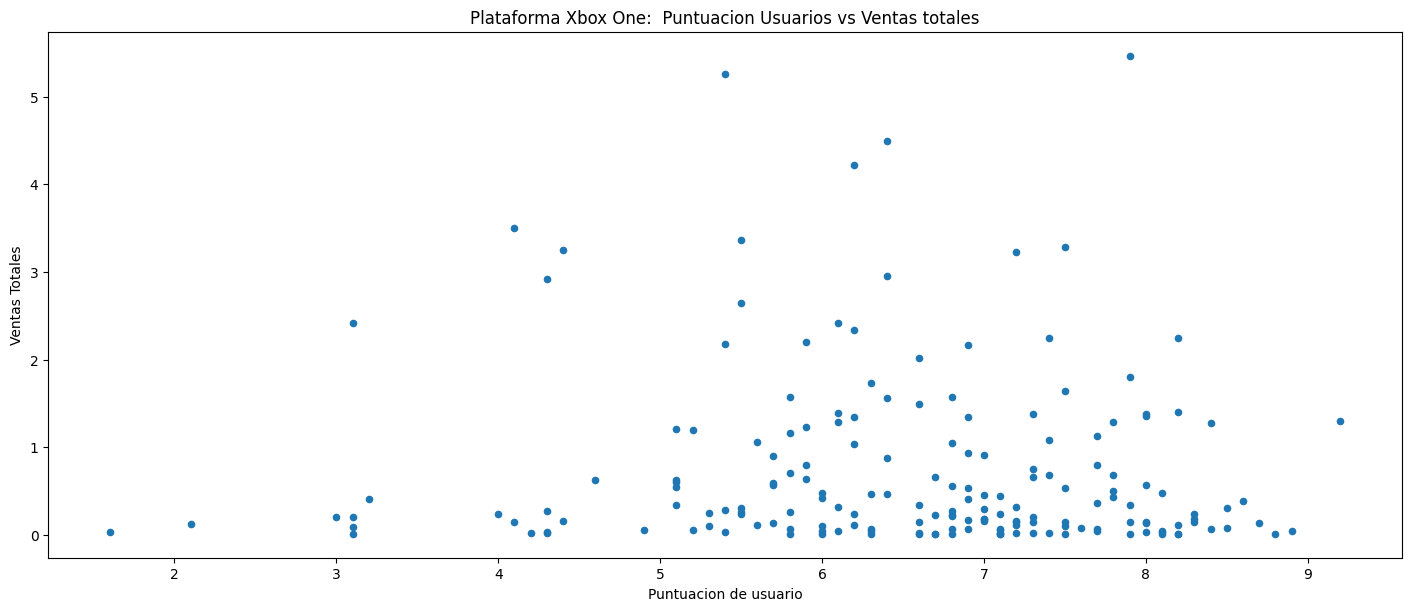

-0.06892505328279414

In [36]:
# xScatter diagram
games.query('platform == "XOne"').plot(x='user_score', y='total_sales', kind='scatter', figsize=(14,6))
plt.title('Plataforma Xbox One:  Puntuacion Usuarios vs Ventas totales')
plt.xlabel('Puntuacion de usuario')
plt.ylabel('Ventas Totales')
plt.show()

# We calculate the correlation between the review and sales
games.query('platform == "XOne"')['user_score'].corr(games.query('platform == "XOne"')['total_sales'])


With a correlation of `-0.068` between video game sales and user reviews, it is concluded that there is no relationship between the variables.


Professional vs Sales Review

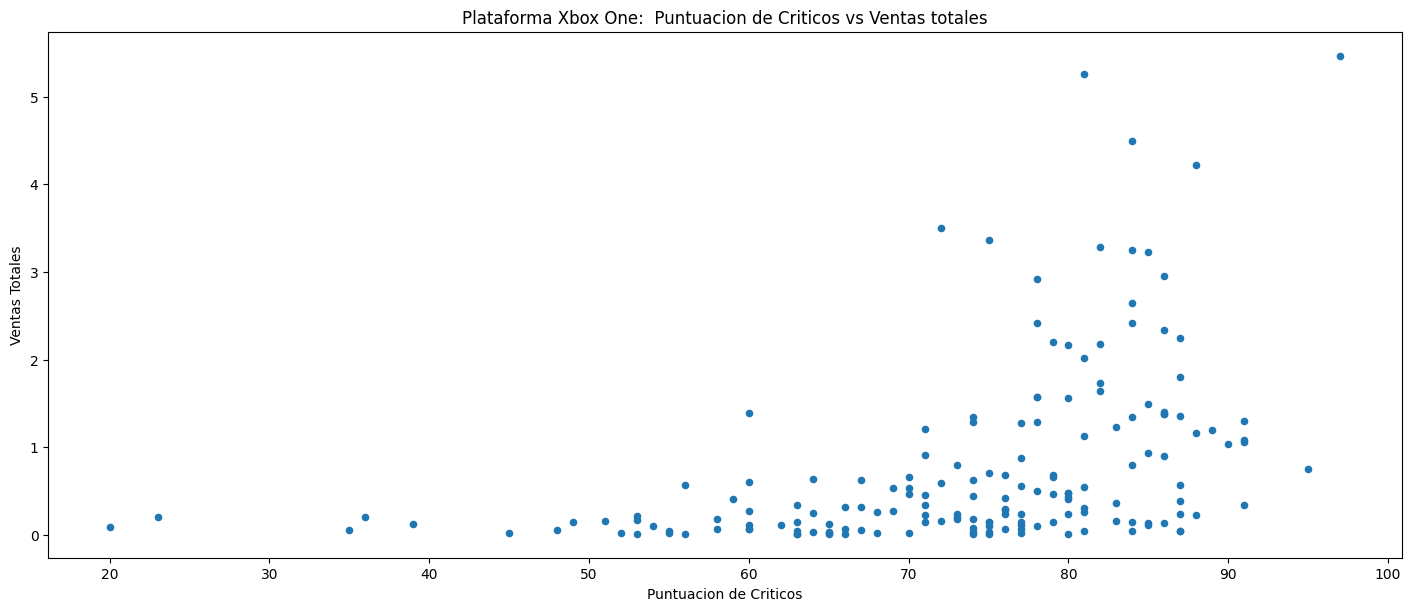

0.4169983280084017

In [37]:
# xScatter diagram
games.query('platform == "XOne"').plot(x='critic_score', y='total_sales', kind='scatter', figsize=(14,6))
plt.title('Plataforma Xbox One:  Puntuacion de Criticos vs Ventas totales')
plt.xlabel('Puntuacion de Criticos')
plt.ylabel('Ventas Totales')
plt.show()

# We calculate the correlation between the review and sales
games.query('platform == "XOne"')['critic_score'].corr(games.query('platform == "XOne"')['total_sales'])

With a correlation of `0.417` between critics' reviews and total sales, it is concluded that there is not a very strong relationship between the variables, some video games have high sales while the reviews of these have low scores.

`CONCLUSION`

There is no relationship between user reviews and total sales of video games, so these reviews do not influence the customer when making a purchase. On the contrary, there seems to be a small relationship between professional reviews and sales, although it is a low correlation in some cases that determines the behavior of video game sales.

### 5.6 Comparison of video games on different platforms

We will find the 10 best-selling video games on the most popular platforms `'XOne', `PS4', `WiiU'` and compare their sales with the other less popular platforms.

In [38]:
# List of platforms to review
platfors = ['XOne','PS4', 'WiiU']

# List of best-selling video games on the most popular platforms
princ_platf = games.query("platform in @platfors")
juegos_top_sales = princ_platf[~princ_platf['name'].duplicated()].sort_values(by='total_sales', ascending=False)

juegos_top_sales[['name', 'platform','total_sales']].head(10)                        

,name,platform,total_sales
31,Call of Duty: Black Ops 3,PS4,14.63
42,Grand Theft Auto V,PS4,12.62
77,FIFA 16,PS4,8.58
87,Star Wars Battlefront (2015),PS4,7.98
92,Call of Duty: Advanced Warfare,PS4,7.66
94,FIFA 17,PS4,7.60
105,Fallout 4,PS4,7.17
110,Mario Kart 8,WiiU,7.09
143,FIFA 15,PS4,6.08
154,Destiny,PS4,5.64


In [39]:
# List of the 10 most popular games
top10_games = juegos_top_sales['name'].head(10).tolist()   

# Top 10 games on other consoles.
juegos_evaluar = games.query("name in @top10_games")[['name','platform','total_sales']].\
    sort_values('name',ascending=True)
juegos_evaluar

,name,platform,total_sales
179,Call of Duty: Advanced Warfare,XOne,5.26
263,Call of Duty: Advanced Warfare,X360,4.28
255,Call of Duty: Advanced Warfare,PS3,4.36
4736,Call of Duty: Advanced Warfare,PC,0.41
92,Call of Duty: Advanced Warfare,PS4,7.66
1049,Call of Duty: Black Ops 3,X360,1.70
99,Call of Duty: Black Ops 3,XOne,7.39
1062,Call of Duty: Black Ops 3,PS3,1.69
31,Call of Duty: Black Ops 3,PS4,14.63
6463,Call of Duty: Black Ops 3,PC,0.26


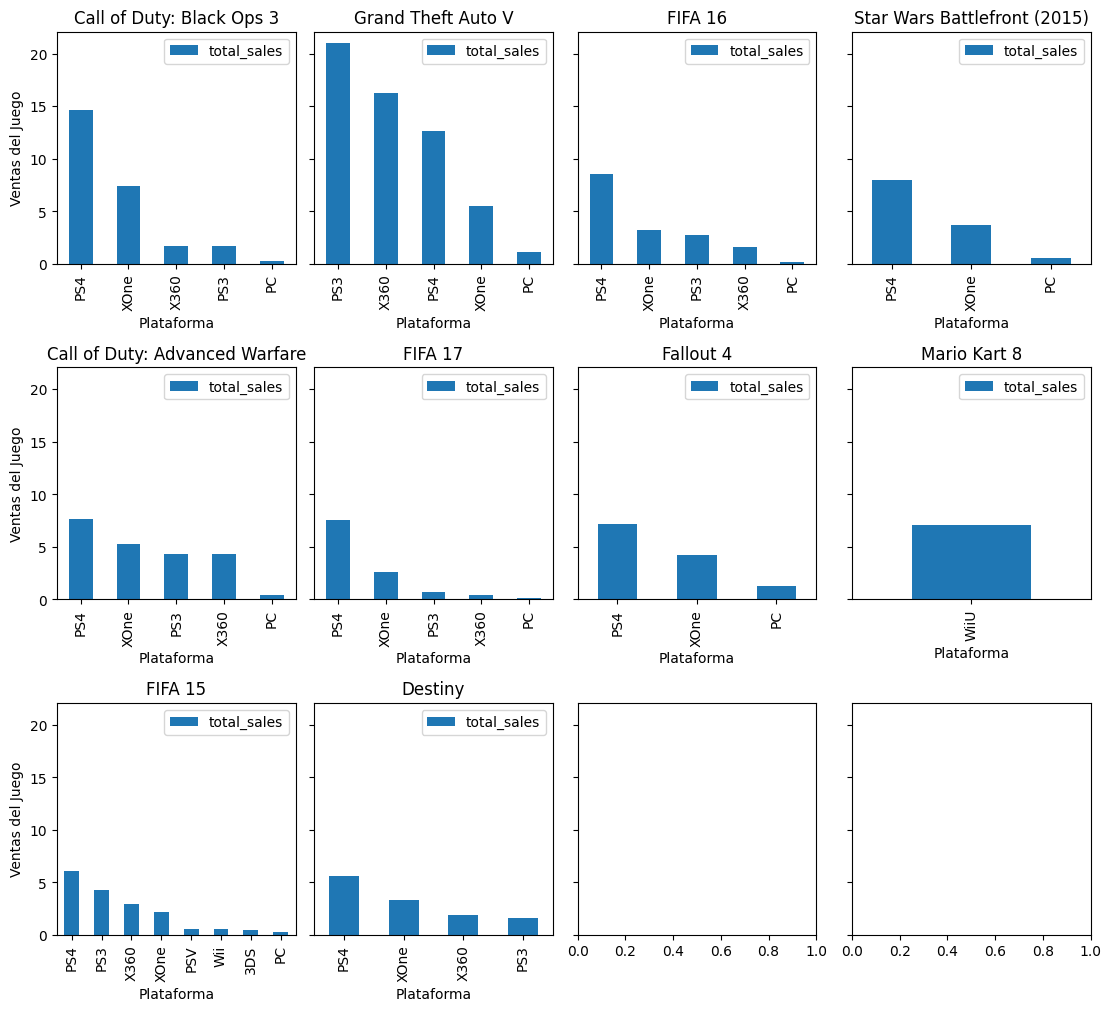

In [40]:
# We use the plt.subplots function to join the 10 graphs that will be generated in the following loop:
# We use the parameter sharey = True so that the graphs share the Y axis and we can compare them.
plt.rcParams['figure.constrained_layout.use'] = True
fig, axes = plt.subplots(3, 4, figsize=(11, 10),sharey=True)

i = 0 # variable that defines the location within plt.subplot

# We use a loop to graph the top games in the top10_games list:
for topgame in top10_games:
    ax = axes[i // 4, i % 4]
    games[games['name'] == topgame].plot(kind='bar',
                                             x='platform',
                                             y='total_sales',
                                             ax =ax,
                                             title=(topgame),
                                             xlabel='Plataforma',
                                             ylabel='Ventas del Juego') 
    i+=1  # Add 1 to move the plot to another box in the subplot
plt.show() 

We can see that video game sales vary between platforms, for example `Call of Duty: Black Ops 3` the game with the most total sales is on the `PS4` platform with `12,500,000 USD` in sales, `XONE` with `7,000,000 USD` in sales, `X360` with `2,000,000 USD` in sales, `PS3` with `2,000,000 USD` in sales `PC` with `1,000,000 USD` in sales. Which is a big difference. The same behavior occurs for the games, `Grand Theft Auto V`, `FIFA 16`, `Star Wars Battlefront (2015)`, `FIFA 17`, `Call of Duty: Advanced Warfare`, `Fallout 4` and `FIFA 15`. Additionally, these video games achieve larger sales than others because they are multiplatform, allowing users of different consoles to play them on their favorite platforms.

It is shown that in general the most current platforms are those that generate greater income with the releases of multiplatform video games than other platforms, as is the case of `PS4` and `XONE`.

A different case occurs with the video games `New Super Mario Bros` and `Mario Kart 8`, these video games are only available for the `WiiU` console, which despite being available on a single platform are in position 8 and 9 of the top 10 video game sales. These could increase their sales if they were multiplatform.

### 5.7 General distribution of video games by genre.

We will graph the total number of video games by genre and the average sales by genre.

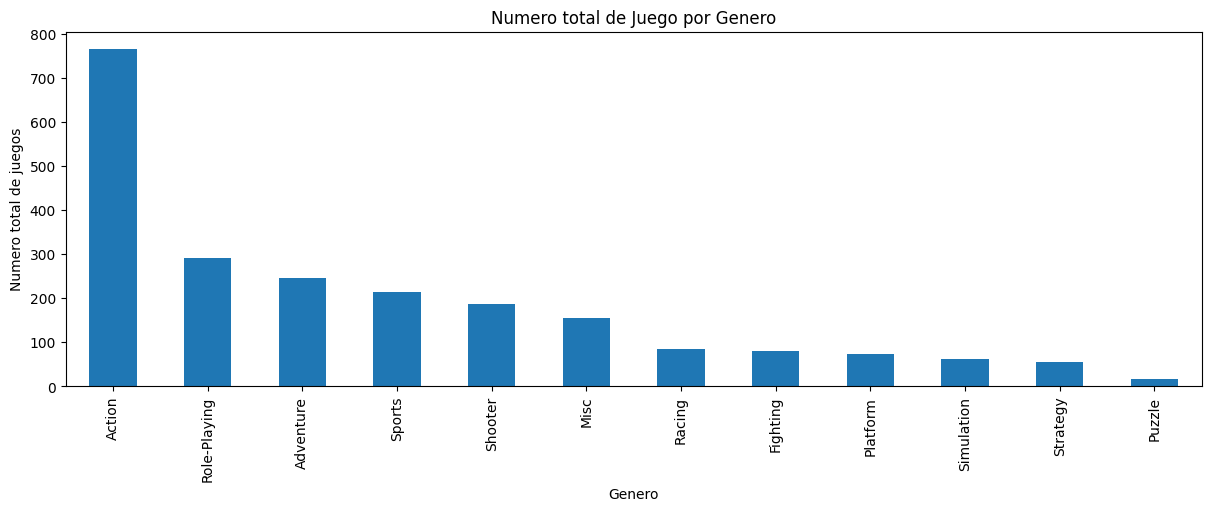

In [41]:
# Total number of games by Genre.
muestra.groupby('genre')['name'].count().sort_values(ascending=False).plot(kind='bar', figsize=(12,5))
plt.title('Numero total de Juego por Genero')
plt.xlabel('Genero')
plt.ylabel('Numero total de juegos')
plt.show()


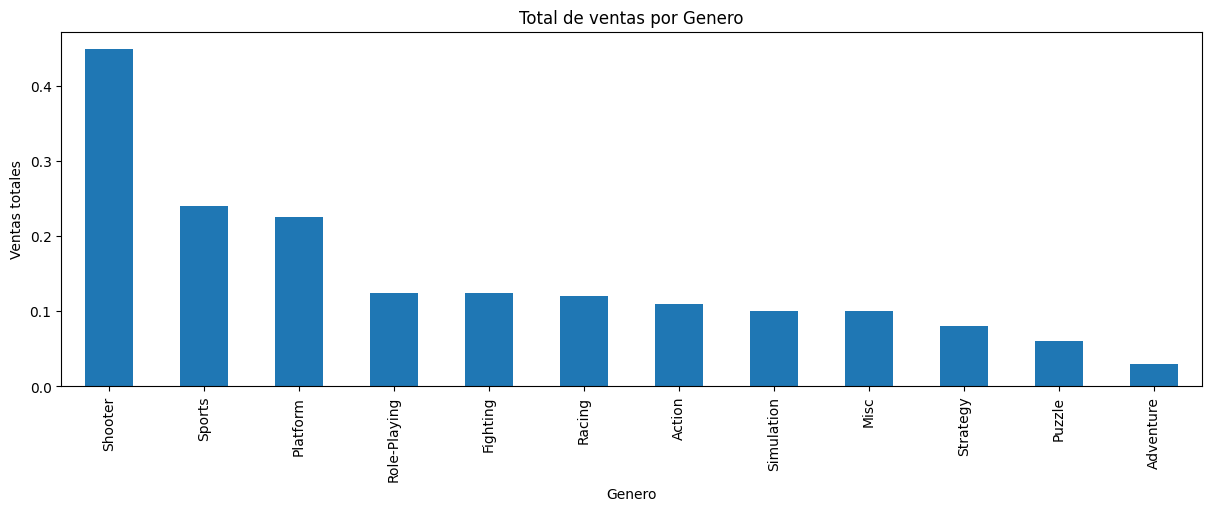

In [42]:
# Total sales average by gender
muestra.groupby('genre')['total_sales'].median().sort_values(ascending=False).plot(kind='bar', figsize=(12,5))
plt.title('Total de ventas por Genero')
plt.xlabel('Genero')
plt.ylabel('Ventas totales')
plt.show()


`What can be said about the most profitable genres? Can you generalize about genres with high and low sales?`

Most of the games released in the evaluation period are of the `Action` genre with an average sales of 100,000 USD and almost 800 games released.

On the other hand, the `Shooter` genre is the genre with the most sales, with 400,000 USD, with only 200 games released.

Finally, it can be seen that the games `Strategy`, `Puzzle` and `Adventure` are the least popular in sales and, in addition, they do not have many releases.

<h2>6 - PLATFORM PROFILES BY REGION</h2>

We will now evaluate the games by region (NA, EU and JP) to find out the most popular genres and ratings during the evaluation period.

### 6.1 Main platforms by Region.

In [43]:
# We group the data by platform, adding sales by region to find out which consoles have the highest sales.
juegos_plataforma = muestra.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'total_sales']]\
    .sum().sort_values(by='total_sales', ascending=False)[0:5]
juegos_plataforma

,na_sales,eu_sales,jp_sales,total_sales
platform,,,,
PS4,108.74,141.09,15.96,314.14
PS3,63.50,67.81,23.35,181.43
XOne,93.12,51.59,0.34,159.32
3DS,38.20,30.96,67.81,143.25
X360,81.66,42.52,0.51,136.80


### 6.1.1 Sales by platform in region `NA`

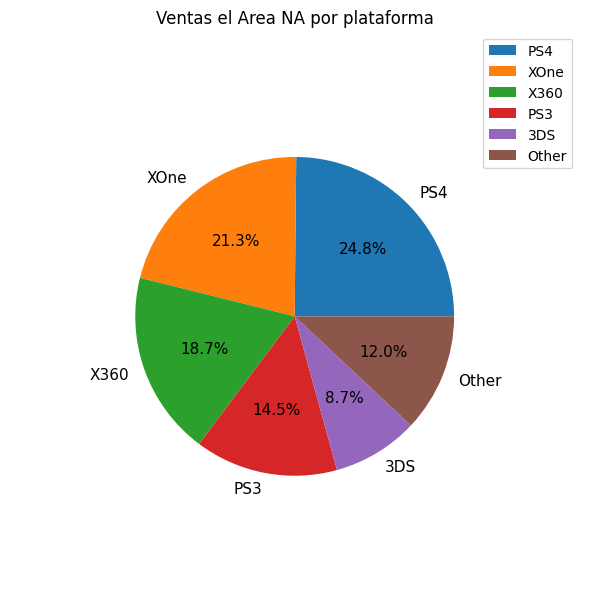

In [44]:
# We obtain the sales data by NA, EU and JP area grouped together.
ventas_areas = muestra.loc[:,['platform', 'na_sales', 'eu_sales', 'jp_sales']]\
    .groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# We filter the sales of the NA area, the first 5 platforms with the most sales
platform_na_sales = ventas_areas['na_sales'].sort_values(ascending=False)[:5]

# We obtain the remaining platforms that will be graphed as "Others" and add their sales
otras_plataformas_na = ventas_areas['na_sales'].sort_values(ascending=False)[5:].sum()

# We added the value of the "other" platforms in a new column called 'Other'
platform_na_sales.loc['Other'] = otras_plataformas_na

# We graph NA sales data in a pie chart. Provide percentages.
platform_na_sales.plot(kind='pie',
                       autopct='%1.1f%%',
                       fontsize= 11,
                       figsize=(7,6),
                       title='Ventas el Area NA por plataforma',
                       radius = 0.7)
plt.legend(loc=0)
plt.ylabel('')
plt.show()


### 6.1.2 Sales by platform in region `EU`

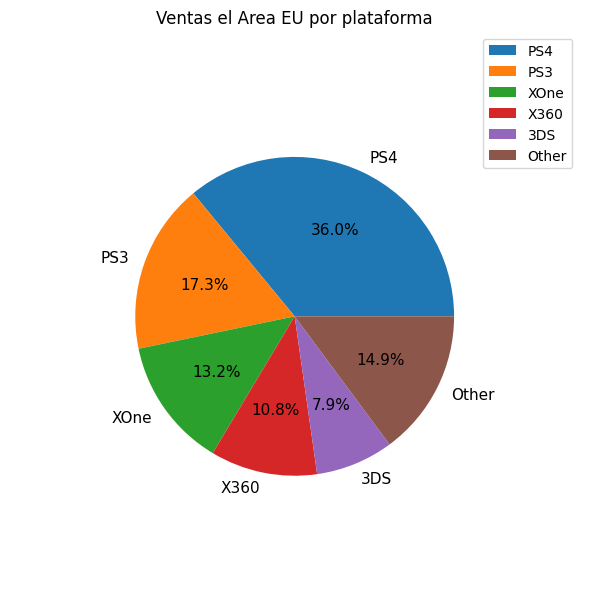

In [45]:
# We filtered sales from the EU area, the top 5 platforms with the most sales
platform_eu_sales = ventas_areas['eu_sales'].sort_values(ascending=False)[:5]

# We obtain the remaining platforms that will be graphed as "Others" and add their sales
otras_plataformas_eu = ventas_areas['eu_sales'].sort_values(ascending=False)[5:].sum()

# We added the value of the "other" platforms in a new column called 'Other'
platform_eu_sales.loc['Other'] = otras_plataformas_eu

# We graphed the US sales data in a pie chart. Provide percentages.
platform_eu_sales.plot(kind='pie',
                       autopct='%1.1f%%',
                       fontsize= 11,
                       figsize=(7,6),
                       title='Ventas el Area EU por plataforma',
                       radius = 0.7)
plt.legend(loc=0)
plt.ylabel('')
plt.show()

### 6.1.3 Sales by platform in region `JP`

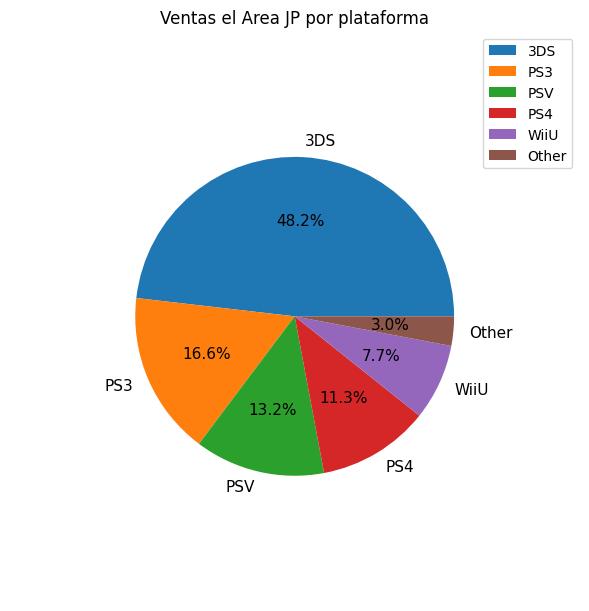

In [46]:
# We filtered sales from the JP area, the top 5 platforms with the most sales
platform_jp_sales = ventas_areas['jp_sales'].sort_values(ascending=False)[:5]

# We obtain the remaining platforms that will be graphed as "Others" and add their sales
otras_plataformas_jp = ventas_areas['jp_sales'].sort_values(ascending=False)[5:].sum()

# We added the value of the "other" platforms in a new column called 'Other'
platform_jp_sales.loc['Other'] = otras_plataformas_jp

# We graph JP's sales data in a pie chart. Provide percentages.
platform_jp_sales.plot(kind='pie',
                       autopct='%1.1f%%',
                       fontsize= 11,
                       figsize=(7,6),
                       title='Ventas el Area JP por plataforma',
                       radius = 0.7)
plt.legend(loc=0)
plt.ylabel('')
plt.show()

### 6.1.4 Conclusions

`PS4` - This is the platform with the best-selling video games in the `NA` and `EU` regions with `24.8%` and `36.0%` respectively. In the `JP` region it ranks 4th in video game sales.

`Xbox One` - It is one of the best-selling platforms in the `NA` region, ranking third in the `EU` region. On the other hand, in the `JP` region, it is not in the top 5 sales and is in the "others" category.

`Xbox 360` - This platform ranks third in `NA` and fourth in `EU`. In contrast, in the `JP` region, it is not in the top 5 sales and is in the "others" category.

`PS3` - This platform is still popular in the `EU` region in second place and in `NA` and `JP` in fourth place.

`3DS` - The most popular platform in the `JP` region with the highest sales of video games. It has almost 50% of the market in `JP`, in `NA` it is ranked 4th and in the `EU` region it is not in the top 5.

`CONCLUSION`

As a general conclusion, video games that will be released in 2017 must be compatible with the `PS4` and `XONE` consoles for the `NA` and `EU` regions. Likewise, in the `JP` region, video games must be compatible with the `3DS` console.

### 6.2 Main genres by Region.

In [47]:
# We group the data by platform adding the sales by GENRE to find out which consoles have the highest sales.
juegos_genero = muestra.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales', 'total_sales']]\
    .sum().sort_values(by='total_sales', ascending=False)[0:5]
juegos_genero

,na_sales,eu_sales,jp_sales,total_sales
genre,,,,
Action,126.05,118.13,40.49,321.87
Shooter,109.74,87.86,6.61,232.98
Sports,65.27,60.52,5.41,150.65
Role-Playing,46.40,36.97,51.04,145.89
Misc,27.49,20.04,9.20,62.82


### 6.2.1 Sales by genre in region `NA`

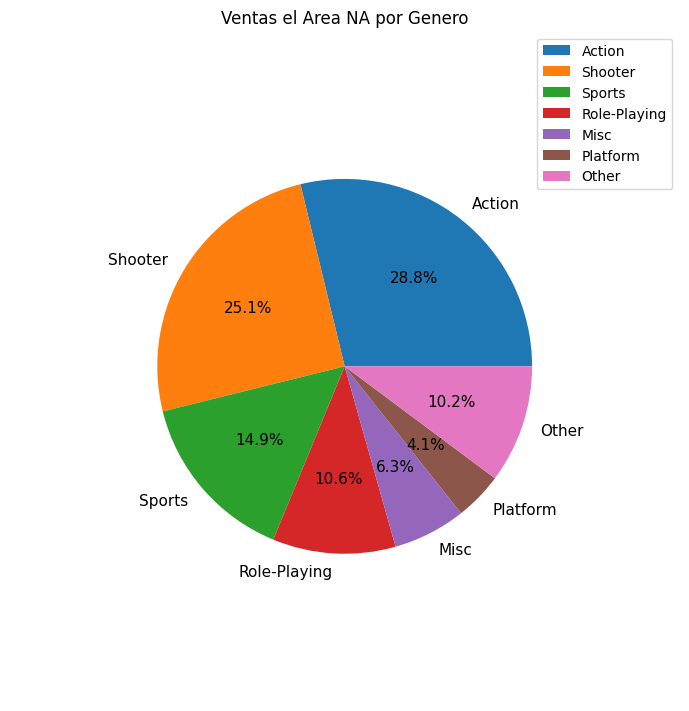

In [48]:
# We obtain the sales data by NA, EU and JP area grouped together.
ventas_genero = muestra.loc[:,['genre', 'na_sales', 'eu_sales', 'jp_sales']]\
    .groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# We filter the sales of the NA area, the first 5 platforms with the most sales
genre_na_sales = ventas_genero['na_sales'].sort_values(ascending=False)[:6]

# We obtain the remaining platforms that will be graphed as "Others" and add their sales
otras_plataformas_na = ventas_genero['na_sales'].sort_values(ascending=False)[6:].sum()

# We added the value of the "other" platforms in a new column called 'Other'
genre_na_sales.loc['Other'] = otras_plataformas_na

# We graph NA sales data in a pie chart. Provide percentages.
genre_na_sales.plot(kind='pie',
                       autopct='%1.1f%%',
                       fontsize= 11,
                       figsize=(7,7),
                       title='Ventas el Area NA por Genero',
                       radius = 0.7)
plt.legend(loc=0)
plt.ylabel('')
plt.show()

### 6.2.2 Sales by gender in region `EU`

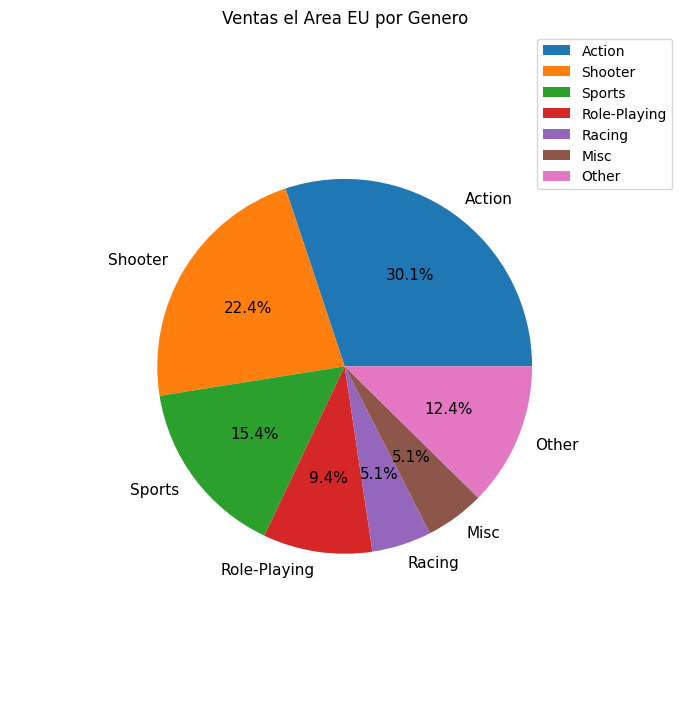

In [49]:
# We filtered sales from the EU area, the top 5 platforms with the most sales
genre_eu_sales = ventas_genero['eu_sales'].sort_values(ascending=False)[:6]

# We obtain the remaining platforms that will be graphed as "Others" and add their sales
otras_plataformas_eu = ventas_genero['eu_sales'].sort_values(ascending=False)[6:].sum()

# We added the value of the "other" platforms in a new column called 'Other'
genre_eu_sales.loc['Other'] = otras_plataformas_eu

# We graphed the US sales data in a pie chart. Provide percentages.
genre_eu_sales.plot(kind='pie',
                       autopct='%1.1f%%',
                       fontsize= 11,
                       figsize=(7,7),
                       title='Ventas el Area EU por Genero',
                       radius = 0.7)
plt.legend(loc=0)
plt.ylabel('')
plt.show()

### 6.2.3 Sales by genre in region `JP`

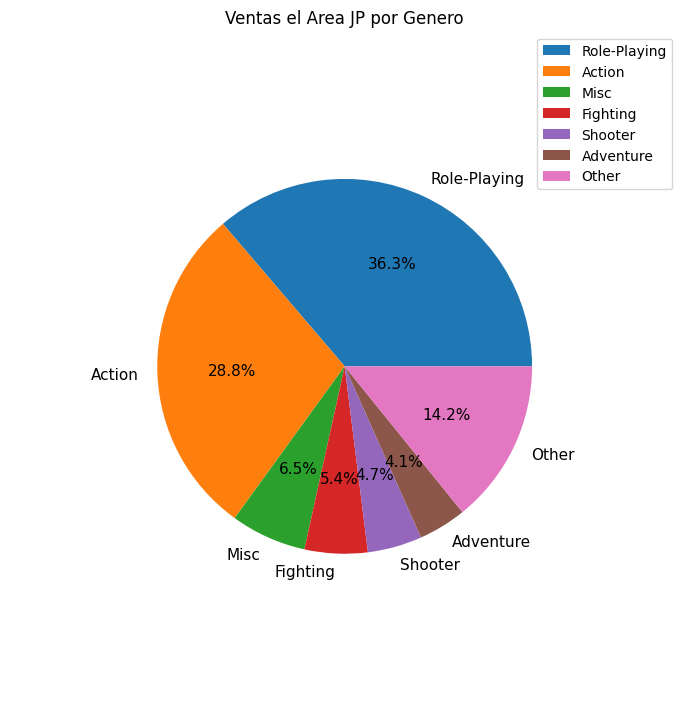

In [50]:
# We filtered sales from the JP area, the top 5 platforms with the most sales
genre_jp_sales = ventas_genero['jp_sales'].sort_values(ascending=False)[:6]

# We obtain the remaining platforms that will be graphed as "Others" and add their sales
otras_plataformas_jp = ventas_genero['jp_sales'].sort_values(ascending=False)[6:].sum()

# We added the value of the "other" platforms in a new column called 'Other'
genre_jp_sales.loc['Other'] = otras_plataformas_jp

# We graph JP's sales data in a pie chart. Provide percentages.
genre_jp_sales.plot(kind='pie',
                       autopct='%1.1f%%',
                       fontsize= 11,
                       figsize=(7,7),
                       title='Ventas el Area JP por Genero',
                       radius = 0.7)
plt.legend(loc=0)
plt.ylabel('')
plt.show()

### 6.2.4 Conclusions

`Action` - The `Action` genre is the highest selling genre in the `NA` and `EU` regions, in the `JP` region it ranks 2nd, in all 3 regions it has 30% of sales.

`Shooter` - The `Shooter` genre ranks 2nd in sales in the `NA` and `EU` regions with 25% and 22% of sales respectively. In the `JP` region it was not in the top 5 so it is in the `Others` category.

`Sports` - The `Sports` genre ranks 3rd in sales in the `NA` and `EU` regions with 15% sales in both regions. In the `JP` region it was not in the top 5 so it is in the `Others` category.

`Role-Playing` - The `Role-Playing` genre ranks 1st in sales in the `JP` region with over 30% of sales. In the `NA` and `EU` regions it ranks 4th with 10% of sales.

`CONCLUSION`

As a general conclusion, the video games that will be released in 2017 must be of the `Action` genre since it has a large audience in the 3 regions, but additionally in the `JP` region, the release of `Role-Playing` genre games is recommended and in the `NA` and `EU` regions, `Shooter` genre games.

### 6.3 Top ESRB Ratings by Region.

In [51]:
# We group the data by platform adding the sales by ESRB to find out which consoles have the highest sales.
juegos_ESRB = muestra.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales', 'total_sales']]\
    .sum().sort_values(by='total_sales', ascending=False)[0:5]
juegos_ESRB

,na_sales,eu_sales,jp_sales,total_sales
rating,,,,
M,165.21,145.32,14.11,371.68
E,79.05,83.36,15.14,200.16
T,49.79,41.95,20.59,126.62
E10+,54.24,42.69,5.89,115.39


### 6.3.1 Sales by ERSB in region `NA`

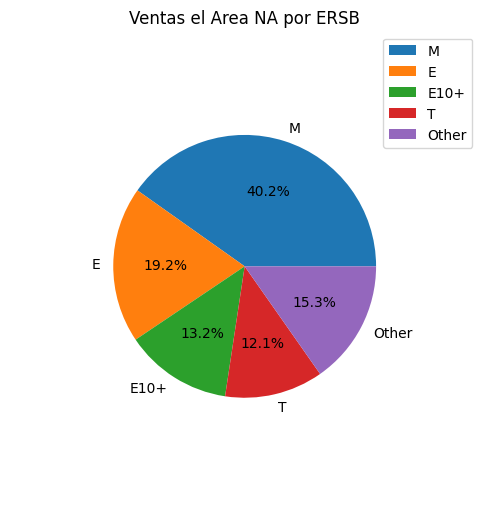

In [52]:
# We obtain the sales data by NA, EU and JP area grouped together.
ventas_ERSB = muestra.loc[:,['rating', 'na_sales', 'eu_sales', 'jp_sales']]\
    .groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# We filter the sales of the NA area, the first 5 platforms with the most sales
ERSB_na_sales = ventas_ERSB['na_sales'].sort_values(ascending=False)[:5]

# We obtain the remaining platforms that will be graphed as "Others" and add their sales
otras_plataformas_na = ventas_genero['na_sales'].sort_values(ascending=False)[5:].sum()

# We added the value of the "other" platforms in a new column called 'Other'
ERSB_na_sales.loc['Other'] = otras_plataformas_na

# We graph NA sales data in a pie chart. Provide percentages.
ERSB_na_sales.plot(kind='pie',
                       autopct='%1.1f%%',
                       fontsize= 10,
                       figsize=(6,5),
                       title='Ventas el Area NA por ERSB',
                       radius = 0.7)
plt.legend(loc=0)
plt.ylabel('')
plt.show()

### 6.3.2 Sales by ERSB in region `EU`

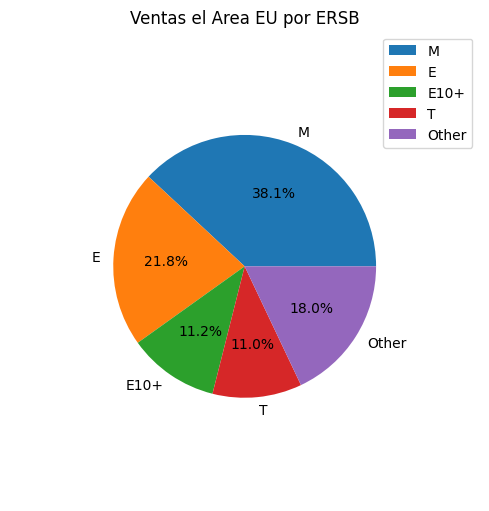

In [53]:
# We filter the sales of the NA area, the first 5 platforms with the most sales
ERSB_eu_sales = ventas_ERSB['eu_sales'].sort_values(ascending=False)[:5]

# We obtain the remaining platforms that will be graphed as "Others" and add their sales
otras_plataformas_eu = ventas_genero['eu_sales'].sort_values(ascending=False)[5:].sum()

# We added the value of the "other" platforms in a new column called 'Other'
ERSB_eu_sales.loc['Other'] = otras_plataformas_eu

# We graph NA sales data in a pie chart. Provide percentages.
ERSB_eu_sales.plot(kind='pie',
                       autopct='%1.1f%%',
                       fontsize= 10,
                       figsize=(6,5),
                       title='Ventas el Area EU por ERSB',
                       radius = 0.7)
plt.legend(loc=0)
plt.ylabel('')
plt.show()

### 6.3.3 Sales by ERSB in region `JP`

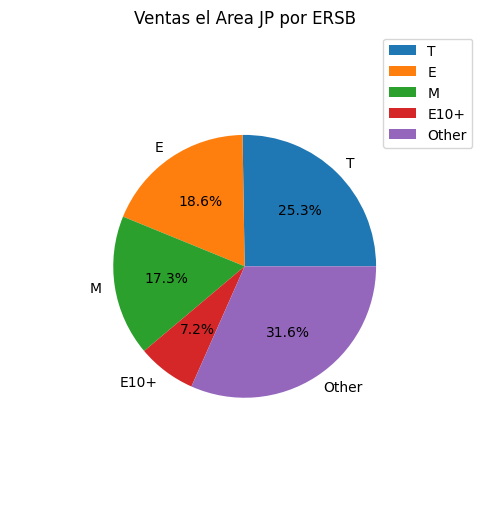

In [54]:
# We filter the sales of the NA area, the first 5 platforms with the most sales
ERSB_jp_sales = ventas_ERSB['jp_sales'].sort_values(ascending=False)[:5]

# We obtain the remaining platforms that will be graphed as "Others" and add their sales
otras_plataformas_jp = ventas_genero['jp_sales'].sort_values(ascending=False)[5:].sum()

# We added the value of the "other" platforms in a new column called 'Other'
ERSB_jp_sales.loc['Other'] = otras_plataformas_jp

# We graph NA sales data in a pie chart. Provide percentages.
ERSB_jp_sales.plot(kind='pie',
                       autopct='%1.1f%%',
                       fontsize= 10,
                       figsize=(6,5),
                       title='Ventas el Area JP por ERSB',
                       radius = 0.7)
plt.legend(loc=0)
plt.ylabel('')
plt.show()

### 6.3.4 Conclusions

Categories:
`E` - Everyone
`E10+` - Everyone 10+
`T` - Teen
`M` - Mature 17+
`A` - Adults Only 18+
`RP` - Rating Pending

In the `NA` and `EU` regions there is the same distribution of sales with respect to video game categories, the top 5 being: 1. `M` with 40% of video game sales, 2. `E` with 20% of sales, 3. `E10+` and 4. `T`. Additionally, 18=% of sales are pending qualification because they are labeled as `RP`.

In the `JP` region the top 4 categories are completely different, having: 1. `T` with 25% of sales, 2. `E` with 18% of sales, 3. `E10+` and 4. `T`.

`CONCLUSION`

New video game launches should focus on the `M` and `T` categories and above all the store should acquire more games from these categories to increase sales.

<h2>7 - HYPOTHESIS TESTS</h2>

### 7.1 Hypothesis: The average user ratings for the Xbox One and PC platforms are the same.

The null hypothesis will state that the average user ratings for video games on the `Xbox One` and `PC` platforms are equivalent. Therefore, the alternative hypothesis will state that the average user ratings for video games on the `Xbox One` and `PC` platforms are NOT equivalent.

We will start the hypothesis testing by getting the data samples, which will contain the video games created for either the Xbox One or PC platforms. The two samples will be stored in `xone_rating` and `pc_rating`. Next, a t-test will be used to calculate the p-value that the average user ratings are equivalent. Both samples will be passed to the t-test function, we will use the parameter `equal_var=True`, since we assume that the variance of the two samples is the same.
The level of statistical significance we will assign is 0.05. If the `p` value is below the significance level of 0.05, we will reject the hypothesis.

In [55]:
# We get the sample data for XOne and PC
calificacion_xone = muestra.loc[muestra['platform'] == 'XOne', 'user_score'].dropna()
calificacion_pc = muestra.loc[muestra['platform'] == 'PC', 'user_score'].dropna()

# Statistical significance 0.05
alpha = 0.05

# We apply the t test, using the samples and using the parameter equal_var=True
results = st.ttest_ind(
    calificacion_xone,
    calificacion_pc,
    equal_var = True)
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la Hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

p-value:  0.14012658403611647
No podemos rechazar la hipotesis nula


After the t-test, we can affirm that the average user ratings for the Xbox One and PC platforms are the same, because the p-value is equal to 0.14 (greater than 0.05).

Let's calculate the average user rating for the samples:

In [56]:
# We obtain the averages of the grades of both samples
mean_xone = calificacion_xone.mean()
mean_pc = calificacion_pc.mean()
print('Calificaion promedio de los usuarios: ')
print('Xbox One: ', mean_xone)
print('PC: ', mean_pc)
print()

Calificaion promedio de los usuarios: 
Xbox One:  6.521428571428572
PC:  6.2696774193548395



The average user ratings for the `XONE` and `PC` consoles are similar.

<div class="alert alert-block alert-warning">
<b>Reviewer Comment</b> <a class="tocSkip"></a>

For these tests I recommend you do a Levene test to show if the variances are equal and add it inside the function. Currently I set it as equal_var=True. To do this, you must first calculate the variances for each of the platforms and then use the following function:

levene(xone_rating, pc_rating)

We will adopt a significance level of 0.05; if the resulting p-value is greater than 0.05, we cannot reject the null hypothesis, and if it is less than 0.05, we reject the null hypothesis, indicating that the variances are not equal.

Just remember that the Levene test is not a substitute for the st.ttest_ind test, but rather a complement to know what to put inside the "equal_var" element. In this case, since we reject the hypothesis of equal variances, we must put False. That is why to finish the test you must perform the st.ttest_ind test considering the result of the Levene test performed.
</div>

### 7.2 Hypothesis: Average user ratings for Action and Sports genres are different.

The null hypothesis will state that the average user ratings of video games of the `Action` and `Sport` genres are equivalent. Therefore, the alternative hypothesis will state that the average user ratings of the `Action` and `Sport` genres are not equivalent.

In [57]:
# We get the samples for the Action and Sports genres
action_calificacion = muestra.loc[muestra['genre'] == 'Action', 'user_score'].dropna()
sports_calificacion = muestra.loc[muestra['genre'] == 'Sports', 'user_score'].dropna()

# Level of statistical significance is equal to 0.05
alpha = 0.05

# We apply the t test, using the samples and using the parameter equal_var=True
results = st.ttest_ind(
    action_calificacion,
    sports_calificacion,
    equal_var = False)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Rechazamos la Hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

p-value:  1.4460039700704315e-20
Rechazamos la Hipotesis nula


After the t-test, we must `reject` the null hypothesis because the p-value is equal to 10.0000000000000000144` (less than 0.05), which means that there is virtually no probability that the average user ratings for Action and Sports video games are equivalent.

<h2>8 - CONCLUSIONS</h2>

Correlations between user and critic ratings:

- There is no relationship between user reviews and total sales of video games, so these reviews do not influence the customer when making a purchase. On the contrary, there seems to be a small relationship between professional reviews and sales, although it is a low correlation in some cases, which determines the sales performance of video games.

Popular Platforms:

- The platforms that are currently growing/leading sales are `PS4`, `Xbox One` and `Nintendo 3DS`.

Genres:

- The most popular genres are `action` and `shoters` in `NA` and `EU`.
- The `Role-Playing` genre is the most popular in the `JP` region.

ESRB Ratings

- ESRB ratings influenced regional sales.
- Sales by ESRB ratings were the same in NA and EU, but different in JP.

Hypothesis

- We reject the null hypothesis that average user ratings for Xbox One and PC platforms are equivalent.
- We cannot reject the null hypothesis that the average user ratings of the Action and Sports genres are equivalent.